In [ ]:

def get_sp500_prices():
    # Get the list of S&P 500 tickers
    sp500 = pd.read_html(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    tickers = sp500.Symbol.tolist()

    # Define the date range
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * 10)

    # Fetch stock prices using yfinance
    sp500_prices = yf.download(tickers, start=start_date, end=end_date)

    return sp500_prices


# Run the function to get the S&P 500 prices
# sp500_prices = get_sp500_prices()

# Print the closing prices for the last 10 years
# print(sp500_prices['Adj Close'])


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
corrtickerlist = ['TLT','SHY','IVV','BITO']
# corrtickerlist = ['IEF','IVV','QQQ','XIU','BRK.A','ARKK','GSG','DXY','BITO','NYFANG','RY','XHB']

In [ ]:
def get_listed_prices(tickerlist):

    # Define the date range
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * 10)

    # Fetch stock prices using yfinance
    sp500_prices = yf.download(tickerlist, start=start_date, end=end_date)

    return sp500_prices['Adj Close']


In [ ]:
def calc_correlations(pricedf, num_days):

    pricedfslice = pricedf[-num_days:]

    correlationmatrix = pricedfslice.dropna(axis='columns').corr()

    return correlationmatrix



In [ ]:
prices = get_listed_prices(corrtickerlist)
prices

[*********************100%***********************]  4 of 4 completed


,BITO,IVV,SHY,TLT
Date,,,,
2013-06-10,NaN,137.590652,76.201271,88.728409
2013-06-11,NaN,136.236359,76.192314,89.784157
2013-06-12,NaN,135.098068,76.183250,88.499931
2013-06-13,NaN,137.150284,76.219345,89.886543
2013-06-14,NaN,136.277893,76.273582,89.673805
...,...,...,...,...
2023-05-31,15.092,419.429993,81.483002,102.716995
2023-06-01,15.020,423.750000,81.610001,103.120003
2023-06-02,15.290,429.790009,81.379997,101.989998


In [ ]:
# previous 22 trading days
corrmat = calc_correlations(prices, 22)
corrmat

,BITO,IVV,SHY,TLT
BITO,1.000000,-0.333326,0.473424,0.460304
IVV,-0.333326,1.000000,-0.670387,-0.292509
SHY,0.473424,-0.670387,1.000000,0.801336
TLT,0.460304,-0.292509,0.801336,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

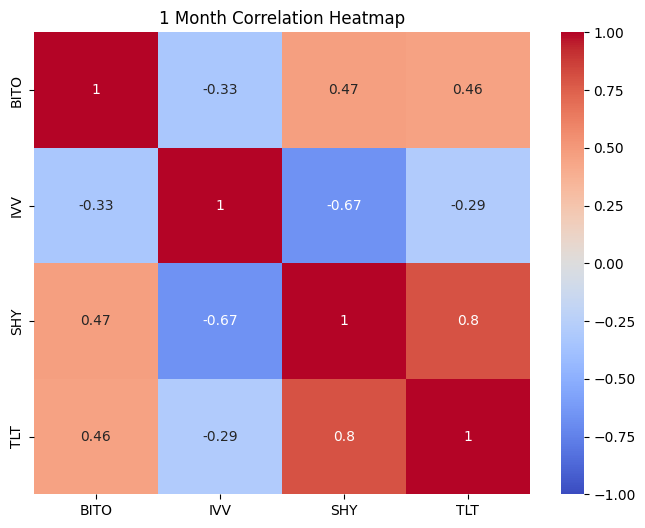

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('1 Month Correlation Heatmap')
plt.show()

In [ ]:
# previous 66 trading days
corrmat66 = calc_correlations(prices, 66)
corrmat66

,BITO,IVV,SHY,TLT
BITO,1.000000,0.305058,0.711201,0.554963
IVV,0.305058,1.000000,0.283337,-0.293921
SHY,0.711201,0.283337,1.000000,0.564357
TLT,0.554963,-0.293921,0.564357,1.000000


In [ ]:
# Plot the correlation heatmap
def subplot_constructor():
  plt.figure(figsize=(8, 6))
  sns.heatmap(corrmat66, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
  plt.title('3 Month Correlation Heatmap')
  plt.show()

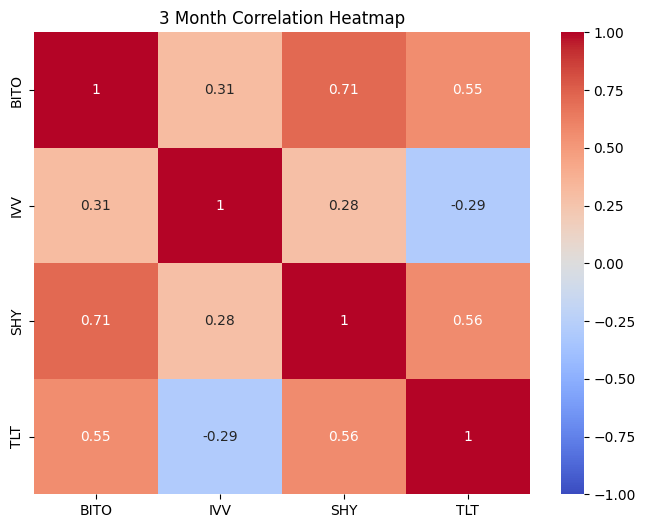

In [ ]:
subplot_constructor()

In [ ]:
# previous 66 trading days
corrmat252 = calc_correlations(prices, 252)

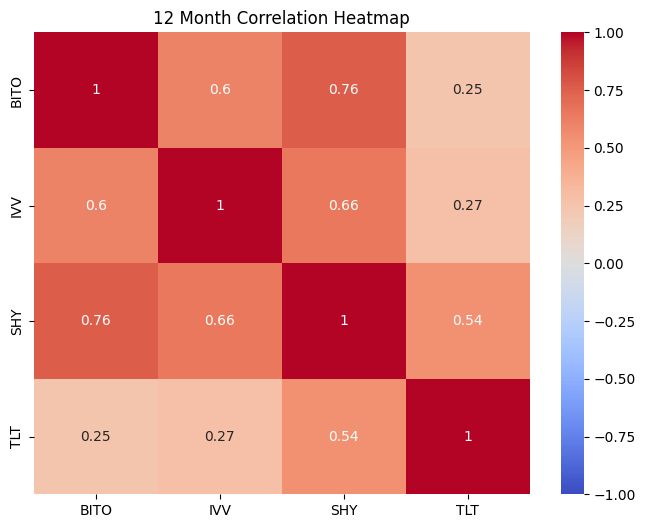

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat252, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('12 Month Correlation Heatmap')
plt.show()

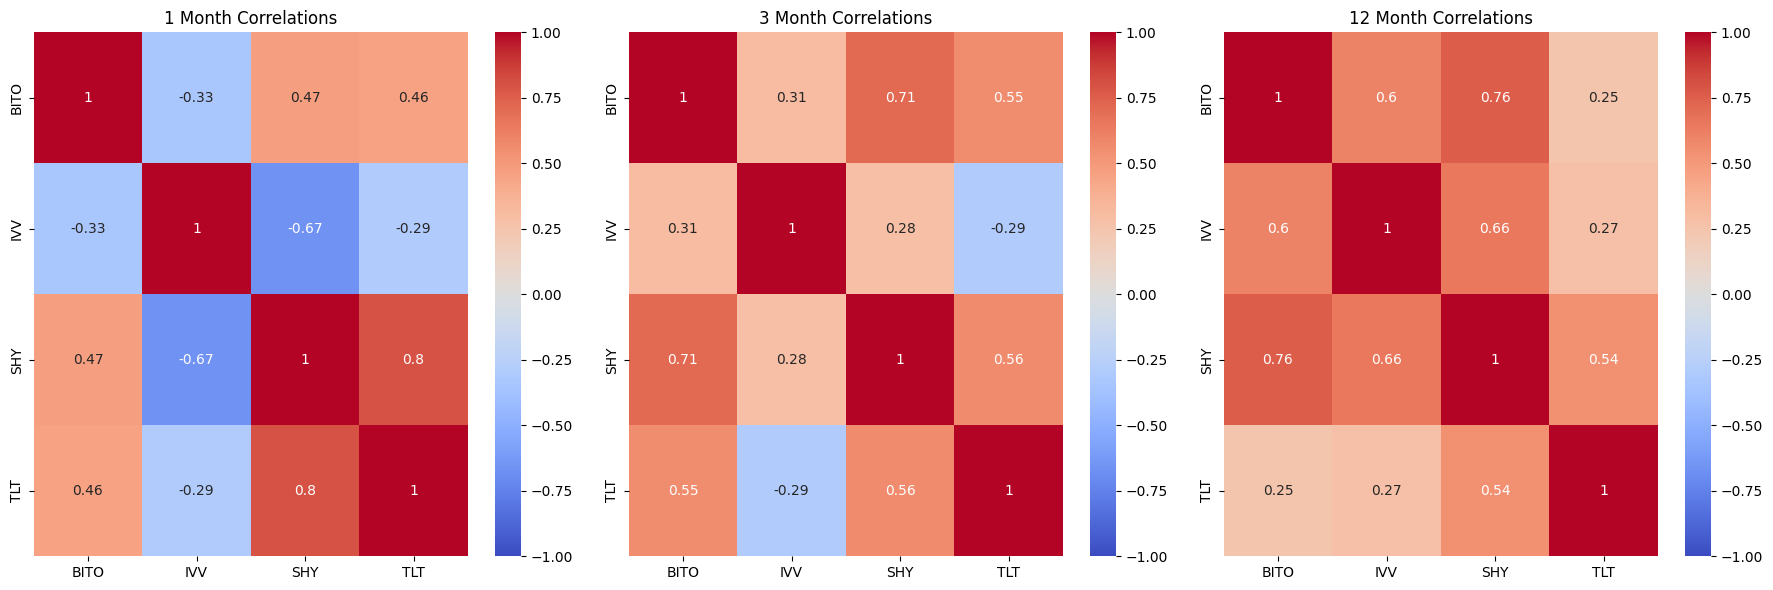

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot the first heatmap
sns.heatmap(corrmat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('1 Month Correlations')

# Plot the second heatmap
sns.heatmap(corrmat66, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('3 Month Correlations')

# Plot the third heatmap
sns.heatmap(corrmat252, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[2])
axes[2].set_title('12 Month Correlations')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
import requests
import time

def get_pe_ratio(symbol):
    api_key = "YOUR_API_KEY"  # Replace with your Alpha Vantage API key
    url = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    if 'PERatio' in data:
        return float(data['PERatio'])
    return None

def get_sp500_stocks():
    url = "https://datahub.io/core/s-and-p-500-companies/r/constituents.csv"
    response = requests.get(url)
    data = response.text
    lines = data.split("\n")[1:-1]
    symbols = [line.split(",")[0] for line in lines]
    return symbols

def main():
    sp500_stocks = get_sp500_stocks()
    count = 0

    for symbol in sp500_stocks:
        if count % 5 == 0 or count == 0:
            time.sleep(5)
        pe_ratio = get_pe_ratio(symbol)
        if pe_ratio is not None:
            print(f"{symbol}: P/E Ratio = {pe_ratio:.2f}")
        else:
            print(f"{symbol}: P/E Ratio not available")
        
        count += 1

if __name__ == "__main__":
    main()


MMM: P/E Ratio = 10.15
AOS: P/E Ratio = 40.86
ABT: P/E Ratio = 30.82
ABBV: P/E Ratio = 32.28
ABMD: P/E Ratio not available
ACN: P/E Ratio not available
ATVI: P/E Ratio not available
ADM: P/E Ratio not available
ADBE: P/E Ratio not available
AAP: P/E Ratio not available
AMD: P/E Ratio not available
AES: P/E Ratio not available
AFL: P/E Ratio not available
A: P/E Ratio not available
APD: P/E Ratio not available
AKAM: P/E Ratio = 29.72
ALK: P/E Ratio = 94.92
ALB: P/E Ratio = 6.83
ARE: P/E Ratio = 25.20
ALGN: P/E Ratio = 73.42
ALLE: P/E Ratio = 19.58
LNT: P/E Ratio = 20.04


ValueError: ignored